In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
# 解决中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # mac 用这行
# 负号正常显示
plt.rcParams['axes.unicode_minus'] = False

import random
def getColor(n=None):
    if n:
        return ['#'+''.join(random.choices('0123456789abcdef',k=6)) for i in range(n)]
    else:
        return '#'+''.join(random.choices('0123456789abcdef',k=6))

### 柱状图
   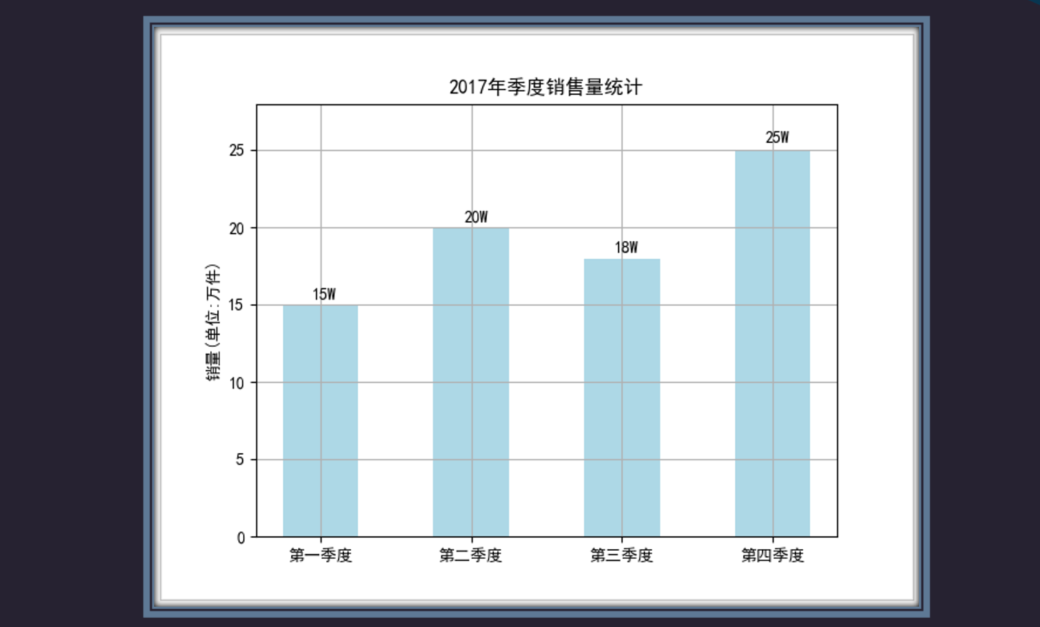

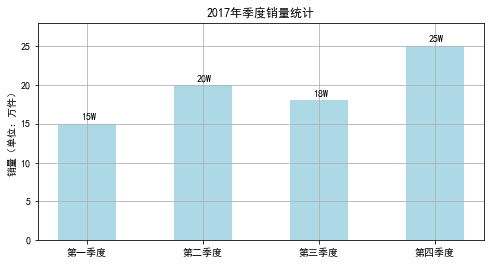

In [2]:
# 画布
plt.figure( figsize=(8,4)) 

# plt.subplot(x,y,z) 将画布分成x行，y列，取 z个 ,得到子画布
ax1 = plt.subplot(1,1,1)

x = [f'第{each}季度' for each in '一二三四']
y = [15,20,18,25]

# 画图，返回四个柱子
rect = ax1.bar( x,y ,width=0.5, color='#add8e6')

for each in rect:
    #  获取柱子的x左边
    bar_x = each.get_x()
    # 获取高度
    bar_height = each.get_height()
    # 设置文本
    ax1.text(bar_x+0.2,bar_height+0.5 , f'{bar_height}W')
    
# 子画布 关于 轴，刻度，标题的方法，都多个 set_
ax1.set_title('2017年季度销量统计')
ax1.set_ylim(0,28)
ax1.set_ylabel('销量（单位：万件）')

ax1.grid()
plt.show()

###  同画布，多图形

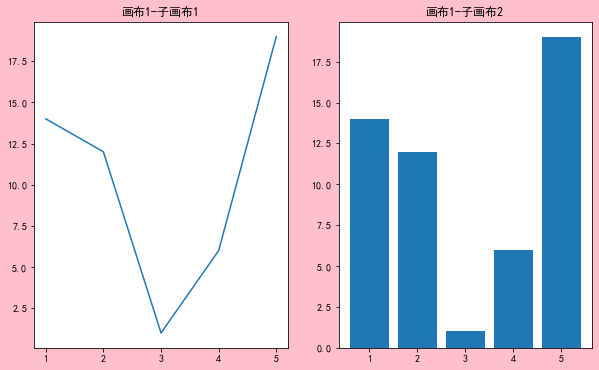

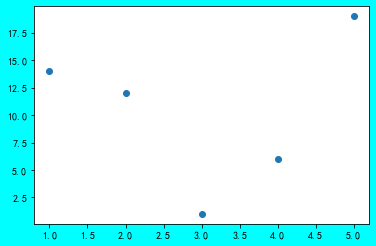

In [3]:
x = [1,2,3,4,5]
y = np.random.randint(1,20,5)

# 画布1
plt.figure( 1 , figsize=(10,6) ,facecolor='pink')

plt.subplot(1,2,1)
# 不用变量接收，也定位到子画布，用 plt 画图

plt.plot(x,y)
plt.title('画布1-子画布1')

# 用变量接收
ax2 = plt.subplot(1,2,2)
ax2.bar(x,y)
ax2.set_title('画布1-子画布2')

# 画布2
plt.figure(2  ,facecolor='cyan')
plt.scatter(x,y)

plt.show()

###  多画布： 划分为 大画布 和 子画布对象们
    plt.subplots( )  比 plt.subplot( )  多个 s
    
    figure,axes = plt.subplots(x,y)
        分为 x * y 个
        figure： 是大画布
        axes：子画布们所在的数组 ， 数组维度根据个数来定
        
        对于子画布，需要下标确定好具体哪个之后再画图

Text(4, 5, '清水池里池水清')

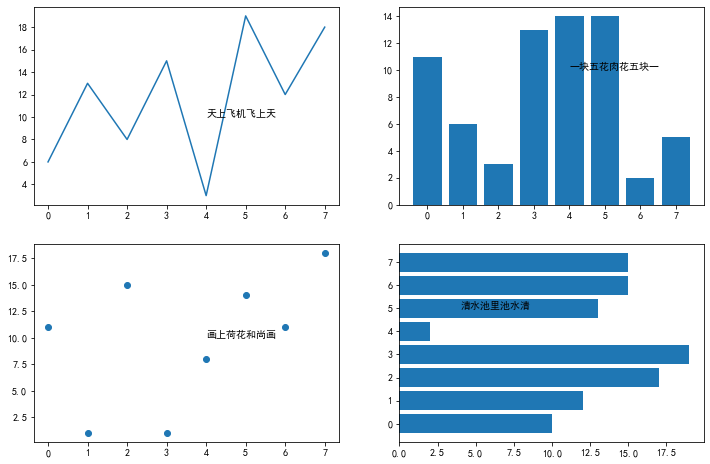

In [4]:
figure,axes = plt.subplots(2,2 ,  figsize=(12,8))

x = range(8)
# 第1行第1个
axes[0][0].plot(x, np.random.randint(1,20,8))
axes[0][0].text(4,10, '天上飞机飞上天')

# 第1行第2个
axes[0][1].bar(x, np.random.randint(1,20,8))
axes[0][1].text(4,10, '一块五花肉花五块一')

# 第2行第1个
axes[1][0].scatter(x, np.random.randint(1,20,8))
axes[1][0].text(4,10, '画上荷花和尚画')

# 第2行第2个
axes[1][1].barh(x, np.random.randint(1,20,8))
axes[1][1].text(4,5, '清水池里池水清')

####  画一个  5x5 , x=y=np.random.randn(50)  散点图

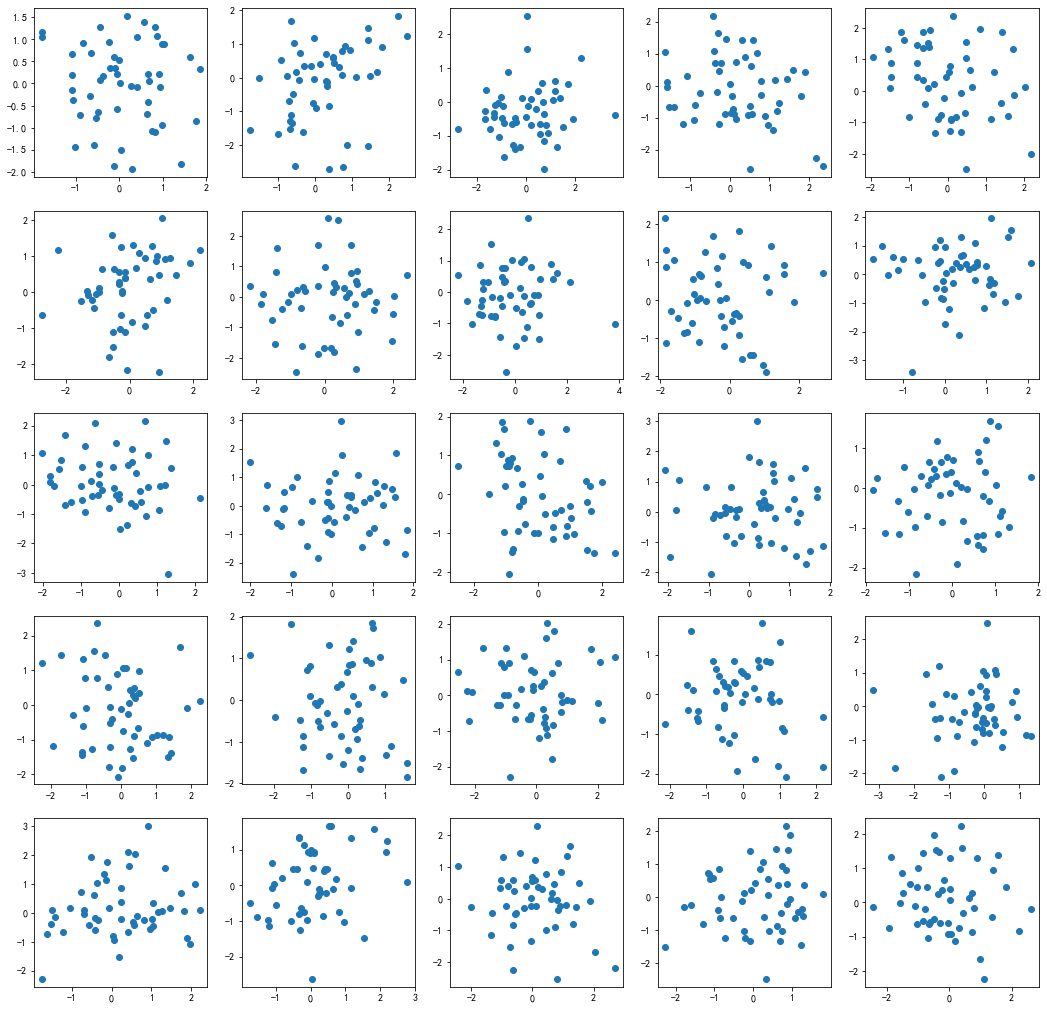

In [5]:
fig,axes = plt.subplots(5,5 ,figsize=(18,18))

for i in range(5):
    for j in range(5):
        axes[i][j].scatter( np.random.randn(50) , np.random.randn(50))

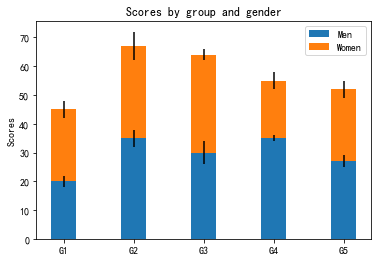

In [6]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

###  pandas 结合 matplotlib 画图
    xxPandasObject.plot( )

In [3]:
s = Series( np.random.randint(1,10,8) , index=list('abcdefgh') )
s

a    3
b    3
c    4
d    3
e    4
f    5
g    8
h    4
dtype: int32

<AxesSubplot:>

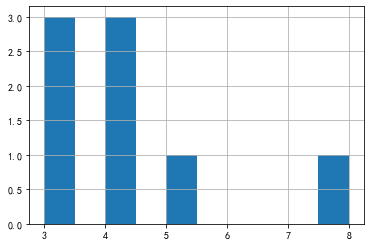

In [4]:
s.hist()

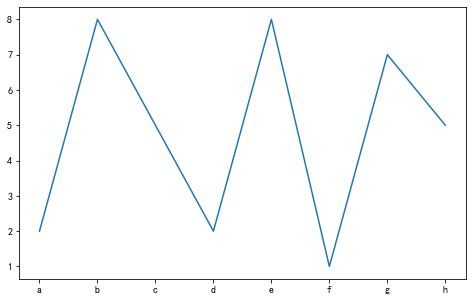

In [13]:
# s.plot(kind='line')

plt.figure(figsize=(8,5))
plt.plot( s.index  ,s.values )

<AxesSubplot:>

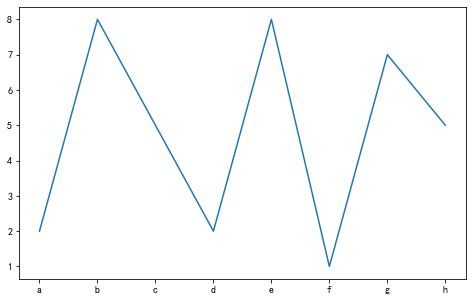

In [15]:
# 传入画布大小的参数
s.plot( figsize=(8,5))

<AxesSubplot:>

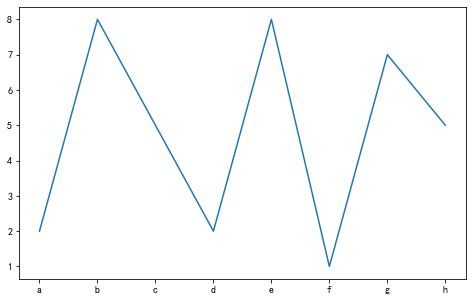

In [16]:
# 互相结合
plt.figure(figsize=(8,5))
s.plot()

<AxesSubplot:>

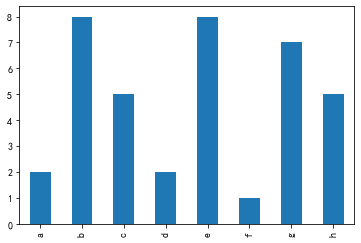

In [17]:
s.plot(kind='bar')

<AxesSubplot:title={'center':'柱状图'}, ylabel='y轴'>

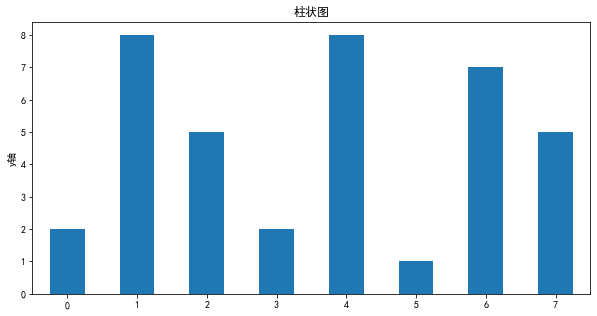

In [26]:
# 设置  x y 轴的label ，x轴的角度，标题等

s.plot(kind='bar' ,figsize=(10,5) ,xlabel='x轴' ,ylabel='y轴' ,
      rot= 0,
      use_index=False ,
       title='柱状图'
      )


<AxesSubplot:ylabel='None'>

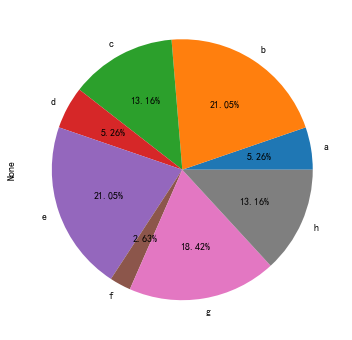

In [28]:
s.plot(kind='pie',figsize=(6,6) , autopct='%.2f%%')

####  series 如何实现 画 到指定的画布中

<AxesSubplot:>

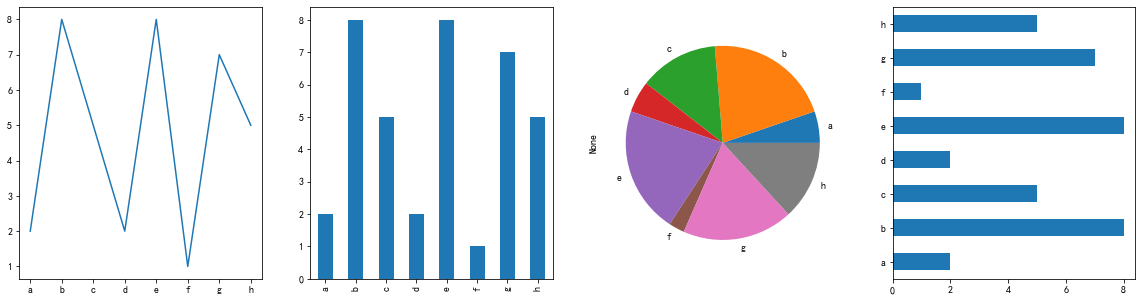

In [36]:
fig,axes = plt.subplots(1,4 , figsize=(20,5))

s.plot(kind='line' ,ax= axes[0])
s.plot(kind='bar' ,ax= axes[1])
s.plot(kind='pie' ,ax= axes[2])
s.plot(kind='barh' ,ax= axes[3])

####  DataFrame

In [38]:
data = DataFrame( np.random.randint(1,20,(8,4)) ,
                index = list('abcdefgh'),
                 columns='one/two/three/four'.split('/')
                )
data

,one,two,three,four
a,15,12,19,2
b,15,12,10,17
c,5,14,16,18
d,16,11,7,5
e,12,11,1,1
f,3,7,18,10
g,12,4,19,17
h,11,2,11,7


<AxesSubplot:>

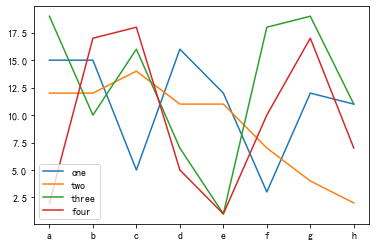

In [39]:
data.plot()

<AxesSubplot:>

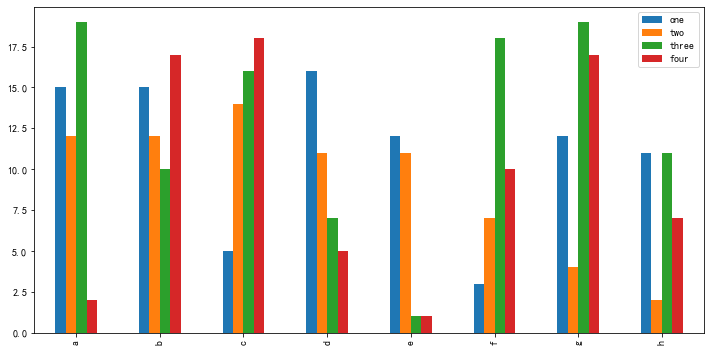

In [43]:
data.plot(kind='bar' ,figsize=(12,6))

<AxesSubplot:>

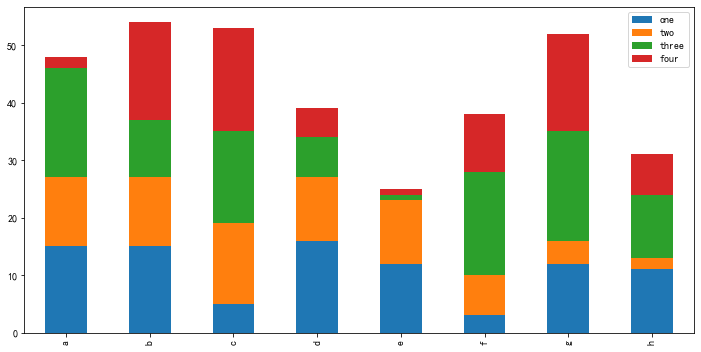

In [44]:
# stacked = True  堆叠
data.plot(kind='bar' ,figsize=(12,6) ,stacked=True)

In [45]:
import tushare as ts

In [46]:
pingan = ts.get_hist_data('601318', '2019-1-1','2021-8-19')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


<AxesSubplot:xlabel='date'>

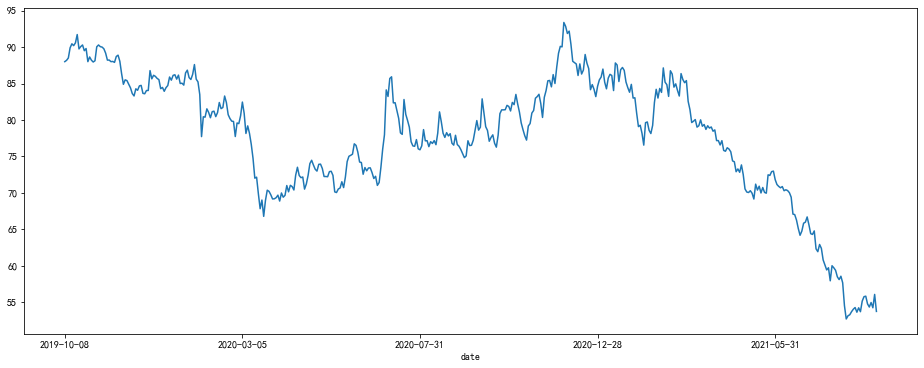

In [51]:
pingan.close.loc[::-1].plot(figsize=(16,6))